In [51]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings(action='ignore') 


In [52]:
train_data = pd.read_csv("./dataset/train_data.csv")
train_data.head()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,1.59,41.00,0.7,20.53,1680,58.67,2.93,0
1,2.97,59.28,0.7,38.40,3142,74.91,3.75,0
2,1.91,45.29,0.7,24.73,2023,62.48,3.12,0
3,2.37,51.33,0.7,30.63,2506,67.84,3.39,0
4,1.90,45.21,0.7,24.65,2017,62.41,3.12,0


In [53]:
X_train = train_data.iloc[:,:-1]
X_train.head(1)

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe
0,1.59,41.0,0.7,20.53,1680,58.67,2.93


In [54]:
y_train = train_data[['type']]
y_train.head(1)

,type
0,0


In [55]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_train_std[:2]

array([[-4.48257396e-01, -9.17212397e-01, -1.11022302e-16,
        -5.11748204e-01, -1.00704610e+00, -9.10351446e-01,
        -3.31821181e-01],
       [ 6.99749260e-01,  1.17832015e+00, -1.11022302e-16,
         8.02045130e-01,  1.11878471e+00,  1.17288334e+00,
         1.88461694e-01]])

In [56]:
pca1 = PCA(n_components=7)
projected_X1 = pca1.fit_transform(X_train_std)
projected_X1

array([[-1.74769431e+00,  3.08677125e-01, -3.21735490e-01, ...,
         1.02694012e-02, -1.64112302e-03, -4.23707721e-18],
       [ 2.23461481e+00, -4.25295821e-01,  8.69874840e-02, ...,
        -3.82961640e-03, -2.59041268e-03,  8.19255778e-18],
       [-8.14667293e-01,  1.34426521e-01, -2.25474237e-01, ...,
         4.62438975e-03, -1.65404210e-03,  1.04799012e-15],
       ...,
       [-2.89437244e+00,  5.22241693e-01, -4.35973134e-01, ...,
         1.25761520e-02, -1.77785326e-03, -6.86708647e-19],
       [-2.83787280e+00,  5.10976453e-01, -4.30813556e-01, ...,
         1.27018965e-02, -1.91472657e-03, -6.81614000e-19],
       [ 1.51747916e+00, -2.94809734e-01,  1.30075749e-02, ...,
        -2.41079145e-03, -2.00383382e-03, -1.42467455e-19]])

In [57]:
X_recon = pca1.inverse_transform(projected_X1)
X_recon[:5]

array([[-4.48257396e-01, -9.17212397e-01, -1.68321513e-16,
        -5.11748204e-01, -1.00704610e+00, -9.10351446e-01,
        -3.31821181e-01],
       [ 6.99749260e-01,  1.17832015e+00, -5.29459745e-17,
         8.02045130e-01,  1.11878471e+00,  1.17288334e+00,
         1.88461694e-01],
       [-1.82052954e-01, -4.25427133e-01, -1.19129516e-15,
        -2.02966335e-01, -5.08304669e-01, -4.21612249e-01,
        -2.11267832e-01],
       [ 2.00615931e-01,  2.66969835e-01, -1.04902155e-16,
         2.30798672e-01,  1.94004688e-01,  2.65957854e-01,
        -3.99551776e-02],
       [-1.90371843e-01, -4.34597954e-01, -1.42867333e-16,
        -2.08847895e-01, -5.17029009e-01, -4.30591709e-01,
        -2.11267832e-01]])

In [58]:
X_recon = sc.inverse_transform(X_recon)
X_recon[:5]

array([[1.590e+00, 4.100e+01, 7.000e-01, 2.053e+01, 1.680e+03, 5.867e+01,
        2.930e+00],
       [2.970e+00, 5.928e+01, 7.000e-01, 3.840e+01, 3.142e+03, 7.491e+01,
        3.750e+00],
       [1.910e+00, 4.529e+01, 7.000e-01, 2.473e+01, 2.023e+03, 6.248e+01,
        3.120e+00],
       [2.370e+00, 5.133e+01, 7.000e-01, 3.063e+01, 2.506e+03, 6.784e+01,
        3.390e+00],
       [1.900e+00, 4.521e+01, 7.000e-01, 2.465e+01, 2.017e+03, 6.241e+01,
        3.120e+00]])

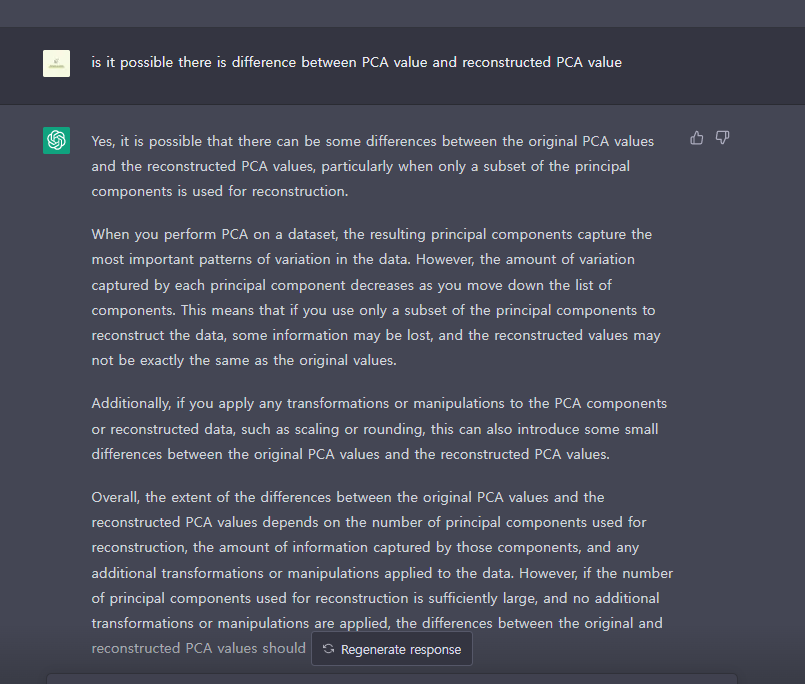